# Machine Learning Workflow

The Objective of this notebook is to familiarize you with the Machine Learning Workflow. It doesn't cover everything.The only pre-requisite is very basic Python.

### Machine Learning Workflow:

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.


For now we will simplify and condense it into 6 steps:
1. Load and prepare Data
2. Exploratory Data Analysis
3. Model Selection
4. Training
5. Testing
6. Save/Load Model

The rest we will cover later on.

## Linear Regression - " Where do you draw the Line? "

In your Physics and Chemistry labs you often have to take readings and plot them on a graph. And to prove some sort of Linear relationship you draw a line on this graph.

But How? How do you know where to draw the line.

The answer is obvious. "Just draw the line that **best fits** the points of data." <br>
Focus on those words **best fit**. Afterall you wouldn't just randomly draw a line and call it a day. There is some criteria, some intuition in your head that you follow to achieve this.

If you want a computer to do this you will need to convert it into an algorithm. That's where Linear Regression comes in. <br>
How do you decide whether someting is a good fit? Well you would need some measurement of wrongness. This measure of wrongness we call the **Loss Function**. There are various Loss Functions that are used throughout Machine Learning. The end goal of any ML model is to find a line or curve which corresponds with the lowest value of the Loss Function for the given data (and also for new data). <br>

Coming back to finding the best fit line, Linear Regression does just that ,it minimizes the Loss Function through the use of something called Gradient Descent.<br>

We will cover how it achieves this in later notebooks. But if you are interested you should definetly check out the videos in the Roadmap.

### Objective:
To get your hands dirty we will use a simple dataset. It consists of only two variables TV-Ads and Sales.

The dataset is availabe at [tvmarketing.csv](https://www.kaggle.com/datasets/devzohaib/tvmarketingcsv) (you will need to make kaggle account).

We will use the number of TV-Ads to predict Sales. <br>

These variables which we use for prediction are called [<u>features</u>](https://cogitotech.medium.com/what-are-features-in-machine-learning-and-why-it-is-important-e72f9905b54d).
And the thing which we are predicting is called the [<u>target</u>](https://h2o.ai/wiki/target-variable/).

This entire process of prediction is called [<u>Regression</u>](https://www.simplilearn.com/regression-vs-classification-in-machine-learning-article). Because we are predicting a contineous value the "Number of Sales" as opposed to [<u>Classification</u>](https://www.simplilearn.com/regression-vs-classification-in-machine-learning-article) where the objective is to Categorize by predicting a discrete value.<br>

For example: Predicting whether you are healthy or not based on a set of factors, in this case prediction can only fall into two categories Healthy or Not Healthy.

And because we are using Linear Regression, it requires both a feature and a target (i.e we train it using both the question and the answer) it is called [<u>Supervised Learning</u>](https://www.ibm.com/topics/supervised-learning#:~:text=Supervised%20learning%2C%20also%20known%20as,data%20or%20predict%20outcomes%20accurately.). There are other algorithms which don't require questions and answers, where we just pass the data to the algorithm and it finds patterns in the data, it is called [<u>Unsupervised Learning</u>](https://www.ibm.com/topics/unsupervised-learning).

Alright thats enough Terminology. Lets begin.



### Libraries we will be using:

#### Installation:
1. Install Python.
2. Install Jupyter
3. Install the libraries - Run the following in your command line.
> pip install numpy pandas matplotlib scikit-learn seaborn joblib

Alternatively you can use [GoogleCollab](https://colab.research.google.com/)
    

In [217]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import sklearn

**Numpy:**  Allows us to use mathematical functions not available in standard Python.<br>
**Pandas:** Excel for python. <br>
**Matplotlib:** For Plotting graphs.<br>
**Sci-kit Learn:** The Main ML Library for python. It contains all the algorithms and utilities for ML.<br>

### 1. Load and Prepare Data

In [218]:
filepath = 'tvmarketing.csv'
data = pd.read_csv(filepath)

Here we first set the filepath or location of the file in which the data is stored.<br>
Pandas is then used to load the data using pd.read_csv() where we pass the filepath as the argument.

Now that the data is loaded. Lets check it out.

In [219]:
data.head() # Shows the first 5 rows of the dataset

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [221]:
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


Both [df.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) and [df.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) give general stats of the Data.

As the Dataset is not very complex Preprocessing is not necessary. In any practical data the dataset will be much larger and will have a many more features and problems. You will have to deal with [Feature Engineering](), [Missing Values](), [Categorical Variables]() (i.e Non-numeric data), [Overfitting/Underfitting]() .etc.

### 2. Exploratory Data Analysis

Plotting the data to find any obvious patterns.

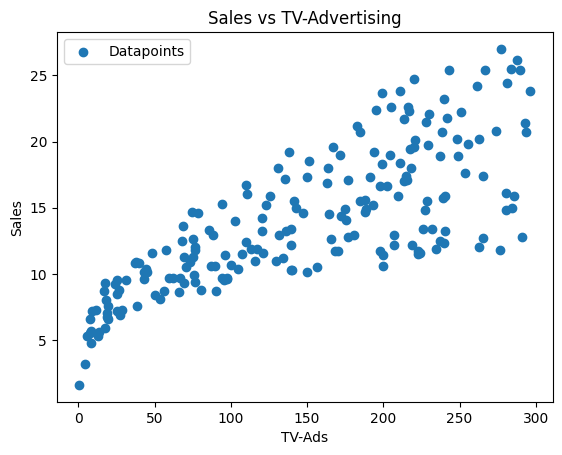

In [236]:
plt.scatter(data['TV'],data['Sales'], label='Datapoints')
plt.xlabel('TV-Ads')
plt.ylabel('Sales')
plt.legend()
plt.title('Sales vs TV-Advertising')
plt.show()

Here we use matplotlibs [plt.scatterplot()](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html#scatter-plot) to draw a scatterplot of the given data, it takes the (x,y) values as input. Then we give it a title , legend and labels.

It is evident that the there is decent linear relationship between TV-Ads and Sales.

To further check this we will find the correlation between these two.

<Axes: >

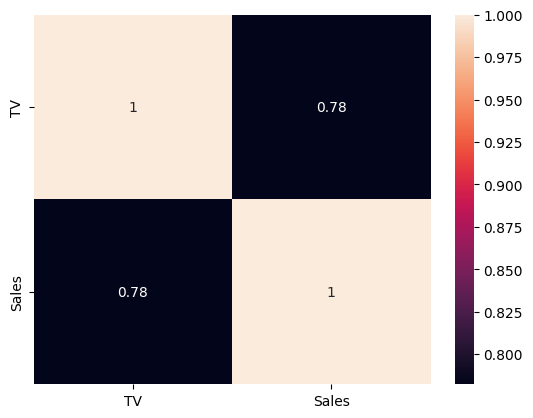

In [223]:
import seaborn as sns

correlation = data.corr()

sns.heatmap(correlation, annot=True)

Here we introduce a new library seaborn which is another library for plotting. [df.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) returns a correlation matrix which consists of correlation between elements of one column with that of other columns.
[sns.heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html) is then used to plot the heatmap of this correlation matrix.

A value +1,-1 show perfect positive and negative correlations while 0 shows no correlation. As the correlation between TV-Ads and Sales is +0.78 it implies that there is a strong linear relationship between these two variables. And therefore we can use Linear Regression to model this.

Now comes what is perhaps the most important part of preparing your data before training. Splitting your data into training and testing sets. But Why?

It is to make sure the model hasn't simply memorized all the answers as it could lead to something called [Overfitting](https://www.freecodecamp.org/news/what-is-overfitting-machine-learning/) where the model performs very well on training data but fails to generalize and doesn't perform well with new data.

By splitting your data into train and test sets you can catch overfitting and proceed to fix it.

In [224]:
from sklearn.model_selection import train_test_split

feature = ['TV']
target = ['Sales']
X = data[feature]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

We split our dataset into target and features (i.e variable we are trying to predict and variables we are trying to make the prediction with respectively).<br>
The convention is to use **X** for features and **y** for targets.

Then [train_test_split()]() is used for splitting, we provide X,y and the size of the test set as arguments. Usually 15-30% data is reserved for test sets here we will use 20% of the data.

### 3. Model Selection

As we already know we will be using Linear Regression. There is not much to consider here. However, in a more complex dataset you would need to take other factors into consideration and test using multiple models.

In [225]:
from sklearn.model_selection import LinearRegression

model = LinearRegression()

Here we import and initialize the LinearRegression model.<br>
Arguments can be provided while initializing models, these arguments are called hyperparamters. Hyperparameter tuning forms a significant part of ML. It can be done with knowledge of the inner-workings of the model or with techniques like [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) or [RandomizedSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV).

### 4. Training

In [226]:
model.fit(X_train,y_train)

LinearRegression()

Training is very simple we just provide the train features and targets and fit it to the model.

### 5. Testing

In [242]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_preds = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_preds)

MSE = mean_squared_error(y_test, y_preds)

print(f"MAE: {MAE}")

print(f"MSE: {MSE}")

MAE: 2.5034669623309953
MSE: 10.136089053483042


Here we pass the test features through the fitted model to get the predictions using [model.predict()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict)<br>
To test the model we calculate the error using [MAE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) and [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). The lower the value of these the more accurate the model is.<br>
There is an interesting insight we can gain from the magnitude of the difference between MAE and MSE, as MSE is higher than MAE it implies that there are large errors or outliers in the predictions.

Lets try to see whether it is correct.



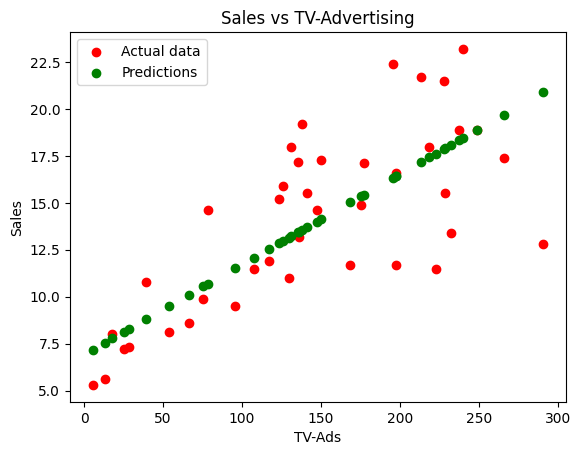

In [228]:
plt.scatter(X_test, y_test, label='Actual data', color = 'red')
plt.scatter(X_test, y_preds, label='Predictions', color = 'green')
plt.legend()
plt.xlabel('TV-Ads')
plt.ylabel('Sales')
plt.title('Sales vs TV-Advertising')
plt.show()

Plotting the actual values and their predictions. We can see that for the first half the errors are low but as we go further they increase rapidly due to the outliers.

Remember what we wanted?. The line of **best fit**. <br>

We'll need to get the slope and y-intercept from the model to find the line.

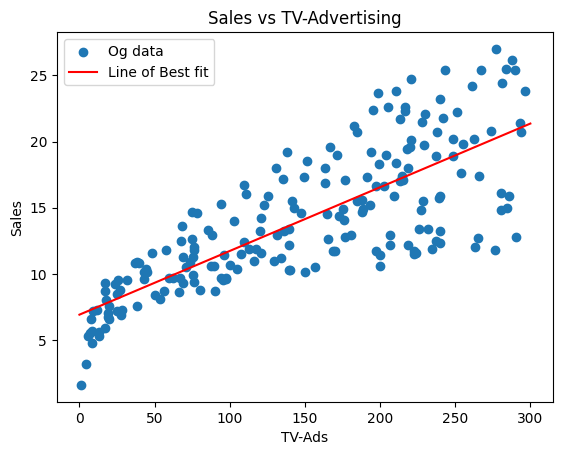

In [229]:
slope = model.coef_[0]
intercept = model.intercept_
x_line = np.linspace(0,300,3000)

y_line = slope*x_line +  intercept

plt.scatter(X,y, label='Og data')
plt.plot(x_line,y_line, color = 'red', label='Line of Best fit')
plt.legend()
plt.xlabel('TV-Ads')
plt.ylabel('Sales')
plt.title('Sales vs TV-Advertising')
plt.show()

We can use [model.coef_]() and [model.intercept_]() to get the slope and intercept respectively. <br>

We use general equation for a line:  $\,\, y=mx+c \,\,$ to plot the line.<br>
[np.linspace()](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) is used to provide x values for the line as we cannot directly plot it.

And with that we finally got the kind of plot we draw in labs. Although the plot doesn't perfectly match the data, it does a pretty decent job.

### 6. Save/Load Model

Now that we have created and trained the model it is time to save it.<br>
In order to save a model we will have to use a library called [joblib](). The model is saved in the pickle format.

In [230]:
import joblib

joblib.dump(model, 'my_first_model.pkl')

loaded_model = joblib.load('my_first_model.pkl')

['my_first_model.pkl']

You use [joblib.dump()]() by passing the model and the filepath and name, make sure it ends with .pkl <br>
To load the model you simply use [joblib.load()]() and pass the filepath of the model. You can use this to make further predictions.

And with that you have finally created and trained your first ML model <br>

You deserve a pat on your back.

Theres a LOT MORE to Machine Learning than what is present in this notebook.
The point of this was to get your hands dirty so that you feel comfortable implementing things on your own. Experiment, experiment, experiment, go to [kaggle.com](kaggle.com) find datasets that you like try out different models, Use the roadmap to learn more, start using more advanced techniques. Deploy your models for others to see . Keep Experimenting! <br>

Please feel free to ask any doubts or point out any mistakes, in the group or you can DM any of us.

## Happy Learning and a very Happy New Year ! ! !